## 사영평면 반환 및 순환행렬로의 변환 알고리즘

#### 전체적인 내용의 흐름은 다음과 같습니다.

1. 수학 이론을 이용해 사영평면에 대한 행렬 표현을 구한다.
2. 구한 행렬을 순환행렬로 변환한다.
3. 이를 이용해 회전 대칭적인 순환행렬 그림을 얻는다.

#### 사용된 정의 및 정리들은 다음과 같습니다.
* [Definition] Finite structure
* [Definition] Projective plane ( = Pi(q) )
* [Definition] Desargusian plane ( = Des(q) )
* [Theorem] 데자르그 평면이면 사영평면이다.
* [Definition] Finite field of order q ( = F_q )
* [Theorem] (Existence and Uniqueness)
* [Theorem] F_p 는 Z_p와 동형이다. (단, p는 소수)
* [Theorem] F_q를 construct 하는 방법 (단, q = p^n, n>1)
* [Definition] Rotational symmetry
* [Definition] Circulant matrix
* [Remark] Finite structure을 순환행렬로 표현 가능하면, rotational symmetry 하다.
* [Remark] 행 교환, 열 교환은 행렬의 정보를 변화시키지 않는다.

### 1. Projective plane of order 3

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df

In [2]:
Order = int(input("숫자를 입력하세요: "))
Zp = [i for i in range(Order)]  # Zp 만들기

Point1 = []       # (x,y,1) x,y는 F의 원소 
Point2 = []       # (x,1,0) x는 F의 원소
Point3 = [[Zp[1],Zp[0],Zp[0]]] # (1,0,0)
    
print("")
print("Field of order", Order,  "=", Zp)
print("")

# Point1 => (x,y,1) 인 경우
for i in range(Order):
    for j in range(Order):
        Point = []
        Point.append(Zp[i])
        Point.append(Zp[j])
        Point.append(Zp[1])
        Point1.append(Point)     
        
# Point2 => (x,1,0) 인 경우
for i in range(Order):
    Point = []
    Point.append(Zp[i])
    Point.append(Zp[1])
    Point.append(Zp[0])
    Point2.append(Point)

Point_set_re = Point1+Point2+Point3
Line_set_re = Point_set_re 

print("Points set :", Point_set_re)
print("")
print("Lines set :", Line_set_re)

숫자를 입력하세요: 3

Field of order 3 = [0, 1, 2]

Points set : [[0, 0, 1], [0, 1, 1], [0, 2, 1], [1, 0, 1], [1, 1, 1], [1, 2, 1], [2, 0, 1], [2, 1, 1], [2, 2, 1], [0, 1, 0], [1, 1, 0], [2, 1, 0], [1, 0, 0]]

Lines set : [[0, 0, 1], [0, 1, 1], [0, 2, 1], [1, 0, 1], [1, 1, 1], [1, 2, 1], [2, 0, 1], [2, 1, 1], [2, 2, 1], [0, 1, 0], [1, 1, 0], [2, 1, 0], [1, 0, 0]]


In [3]:
Line_set = Line_set_re
Point_set = Point_set_re

In [4]:
size = len(Point_set)
Point_set_ind = [1,2,3,4,5,6,7,8,9,10,11,12,13]
Line_set_ind = Point_set_ind

Matrix_des3 = df(data = np.zeros((size,size)), columns = Point_set_ind, index = Line_set_ind,
                 dtype = 'int', copy=False)

In [5]:
# Des(3) 

print(" Lines", "                        Points")
print("")
for i in range(len(Line_set)):
    Incidence_Point = []
    for j in range(len(Point_set)):
        if np.sum(np.array(Line_set[i]*np.array(Point_set[j])))%3 == 0:
            Incidence_Point.append(Point_set[j])
            Matrix_des3.iloc[i, j] = 1   # Matrix
    
    print(Line_set[i] , " = " , Incidence_Point)

 Lines                         Points

[0, 0, 1]  =  [[0, 1, 0], [1, 1, 0], [2, 1, 0], [1, 0, 0]]
[0, 1, 1]  =  [[0, 2, 1], [1, 2, 1], [2, 2, 1], [1, 0, 0]]
[0, 2, 1]  =  [[0, 1, 1], [1, 1, 1], [2, 1, 1], [1, 0, 0]]
[1, 0, 1]  =  [[2, 0, 1], [2, 1, 1], [2, 2, 1], [0, 1, 0]]
[1, 1, 1]  =  [[0, 2, 1], [1, 1, 1], [2, 0, 1], [2, 1, 0]]
[1, 2, 1]  =  [[0, 1, 1], [1, 2, 1], [2, 0, 1], [1, 1, 0]]
[2, 0, 1]  =  [[1, 0, 1], [1, 1, 1], [1, 2, 1], [0, 1, 0]]
[2, 1, 1]  =  [[0, 2, 1], [1, 0, 1], [2, 1, 1], [1, 1, 0]]
[2, 2, 1]  =  [[0, 1, 1], [1, 0, 1], [2, 2, 1], [2, 1, 0]]
[0, 1, 0]  =  [[0, 0, 1], [1, 0, 1], [2, 0, 1], [1, 0, 0]]
[1, 1, 0]  =  [[0, 0, 1], [1, 2, 1], [2, 1, 1], [2, 1, 0]]
[2, 1, 0]  =  [[0, 0, 1], [1, 1, 1], [2, 2, 1], [1, 1, 0]]
[1, 0, 0]  =  [[0, 0, 1], [0, 1, 1], [0, 2, 1], [0, 1, 0]]


#### 이를 행렬로 표현하면 다음과 같습니다.

In [6]:
Matrix_des3

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,0,0,0,0,0,0,0,0,0,1,1,1,1
2,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,1,1,1,0,0,0
5,0,0,1,0,1,0,1,0,0,0,0,1,0
6,0,1,0,0,0,1,1,0,0,0,1,0,0
7,0,0,0,1,1,1,0,0,0,1,0,0,0
8,0,0,1,1,0,0,0,1,0,0,1,0,0
9,0,1,0,1,0,0,0,0,1,0,0,1,0
10,1,0,0,1,0,0,1,0,0,0,0,0,1


#### 구해낸 행렬을 순환행렬로 변환하기 위해 필요한 함수들은 아래와 같습니다.

In [8]:
# Col 바꾸는 함수

def change_col(a,b,matrix):
    cols = matrix.columns.tolist()
    for i in range(len(cols)):
        if int(a) == cols[i]:
            tmp_a = i   # a값이 해당하는 index값
        elif int(b) == cols[i]:
            tmp_b = i   # b값이 해당하는 index값
    
    del cols[tmp_a]
    cols.insert(tmp_a,b)
    del cols[tmp_b]
    cols.insert(tmp_b, a)
    matrix = matrix[cols]
    
    return matrix

In [9]:
# Row 바꾸는 함수

def change_row(a,b,matrix):
    rows = matrix.index.tolist()
    
    for i in range(len(rows)):
        if a == rows[i]:
            tmp_a = i
        if b == rows[i]:
            tmp_b = i
            
    del rows[tmp_a]
    rows.insert(tmp_a,b)
    del rows[tmp_b]
    rows.insert(tmp_b,a)
    matrix = matrix.reindex(index=rows)
    
    return matrix

In [73]:
# 각 i_th row(i>1)에서 1이 있어야 할 열의 인덱스 리스트

def poition_index_of_ith_row(i, matrix, fix_index):
    
    #fix_index = [1,2,4,5]  #초기배치 설정
    one_list = [1,1,1,1]
    for j in range(len(one_list)):
        one_list[j] = i-1
    
    fix_index = [(x+y)%13 if x+y>13 else x+y for x,y in zip(fix_index, one_list)]
    fix_index_real_col_num = []
    for j in range(len(fix_index)):
        fix_index_real_col_num.append(matrix.columns[fix_index[j]-1])
        
    return fix_index_real_col_num

In [11]:
# 접근한 행에 대하여 1이 있는 column의 인덱스 리스트

def index_of_one(ind, matrix):
    index_list = []
    for i in range(1, len(matrix)+1):
        if matrix.loc[ind,i] == 1:
            index_list.append(i)
            
    return index_list  

In [12]:
# j번째 row의 1의 개수를 세주는 함수 (Col은 i번째 이상에서만)

def jth_row_CountOne(i, j, matrix):  # j행을 접근해서 i열부터 1의 개수를 세야함 
    
    jth_row = matrix.loc[j] # 접근한 j번째 행의 row
    weight = 0
    
    for k in range(i-1, len(jth_row)):
        if jth_row.iloc[k] == 1:
             weight += 1 
    
    return weight

In [13]:
# weight값을 만족하는 후보 row들의 인덱스 값을 가진 리스트를 반환하는 함수

def candidate_row_index(i, weight_of_ith, matrix):
    
    row_list= matrix.index.tolist()
    #print("row_list :", row_list)
    sum_value_of_one = weight_of_ith[i-1]
    candidate_list=[]
    
    for k in range(i-1,len(matrix)):
        if sum_value_of_one == jth_row_CountOne(i, row_list[k], matrix):
            candidate_list.append(row_list[k])
            
    return candidate_list

In [14]:
# 한 Row의 특정원소 matrix(i,j)에서 j열의 i행 이하의 원소값들을 리스트화 해주는 함수

def element_list_of_rows(row_index, col_index, matrix):
    
    row_index_list = matrix.index.tolist()
    using_row_index_list = []
    for j in range(len(row_index_list)):
        
        if row_index_list[j] == row_index:
            break
        using_row_index_list.append(row_index_list[j])
        
    list = []
    for element in using_row_index_list:
        list.append(matrix.loc[element,col_index])
        
    return list

In [15]:
# 두 리스트가 주어지면 같은 인덱스의 원소들을 비교해주는 함수

def check_element(list1, list2):
    check = 0
    for x,y in zip(list1, list2):
        if x != y :
            check +=1
    if check ==0:
        return True
    else:
        return False

In [16]:
# 두 리스트에서 공통된 원소만 제거 (list1 - list2)

def list_remove_operation(list1, list2):
    
    list3 = []
    for i in list1:
        if i not in list2:
            list3.append(i)
            
    return list3

In [17]:
# 두 리스트의 원소들 조합

def combination_list(list1, list2):
    
    combination = []
    for x in itertools.permutations(list1,len(list2)):
        group = []
        for pair in zip(x, list2):
            group.append(pair)
        combination.append(group)
    
    return combination

In [18]:
# 각 후보행들마다 열이 잘 바뀌는지 확인해주는 함수

def check_condition(ind, position_index, updated_matrix):
    
    existence_value = False
    
    selected_position_ith_one = index_of_one(ind, updated_matrix)
    
    # 각 리스트끼리 빼준다(공통index 제거)
    ith_one_position = list_remove_operation(selected_position_ith_one, position_index)
    position_index = list_remove_operation(position_index, selected_position_ith_one)
    
    combination = combination_list(ith_one_position, position_index)
     
    for group in combination:
        
        check_list = []
        for pair in group:        
            
            list1 = element_list_of_rows(ind, pair[0], updated_matrix)
            list2 = element_list_of_rows(ind, pair[1], updated_matrix)
            
            if check_element(list1, list2) == True:
                check_list.append(1)
            else:
                break
                
        if len(check_list) == len(group):
            selected_group = group
            
            existence_value = True
            
            return existence_value, selected_group
            break
    
    if existence_value == False:
        return existence_value, []

In [19]:
# 선택된 조합에 따라 열들을 바꿔주는 함수

def change_columns(selected_group, updated_matrix):
    
    for i in range(len(selected_group)):

        matrix = change_col(selected_group[i][0], selected_group[i][1], updated_matrix)
        updated_matrix = matrix
    return updated_matrix

#### 위의 함수들을 사용하여 주어진 행렬을 순환행렬로 변환하려 합니다.

In [74]:
Matrix = Matrix_des3
Matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,0,0,0,0,0,0,0,0,0,1,1,1,1
2,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,1,1,1,0,0,0
5,0,0,1,0,1,0,1,0,0,0,0,1,0
6,0,1,0,0,0,1,1,0,0,0,1,0,0
7,0,0,0,1,1,1,0,0,0,1,0,0,0
8,0,0,1,1,0,0,0,1,0,0,1,0,0
9,0,1,0,1,0,0,0,0,1,0,0,1,0
10,1,0,0,1,0,0,1,0,0,0,0,0,1


#### 1행을 먼저 정렬한 후, 이를 기준으로 이후의 행들도 정렬 가능한지 확인할 것입니다.
#### 다시 말해, 주어진 행렬이 순환행렬로 변환 가능한지를 확인합니다.

In [21]:
updated_matrix = change_col(1,10,Matrix)
updated_matrix = change_col(3,11,updated_matrix)
updated_matrix = change_col(6,12,updated_matrix)
updated_matrix = change_col(7,13,updated_matrix)

updated_matrix

,10,2,11,4,5,12,13,8,9,1,3,6,7
1,1,0,1,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,1,0,1,1,0
3,0,1,0,0,1,0,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,1,0,0,0,1
5,0,0,0,0,1,1,0,0,0,0,1,0,1
6,0,1,1,0,0,0,0,0,0,0,0,1,1
7,1,0,0,1,1,0,0,0,0,0,0,1,0
8,0,0,1,1,0,0,0,1,0,0,1,0,0
9,0,1,0,1,0,1,0,0,1,0,0,0,0
10,0,0,0,1,0,0,1,0,0,1,0,0,1


#### 다음은 2행 이후의 행에 대한 정렬 과정입니다.

In [24]:
# 1행에 의한 weight_list 생성

weight_of_ith = []

k=1
for i in range(len(updated_matrix)):
    sum = 0
    for j in range(k):
        sum+=updated_matrix.iloc[0,j]
    k+=1
    weight_of_ith.append(sum)

weight_of_ith.reverse() 
weight_of_ith

[4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 1, 1]

In [27]:
fix_index = [1,3,6,7] # 첫 번째 라인 위에 있는 점들의 위치

for i in range(2, len(updated_matrix)):
    ind = updated_matrix.index[i-1] # 접근할 행
    print("i =", i)
    print("ind =", ind)
    position_index = poition_index_of_ith_row(i, updated_matrix, fix_index)
    print("position :", position_index)
    # 후보 열 인덱스 가져온 리스트
    #candidate_row_ind_list = candidate_row_index(i, weight_of_ith, updated_matrix)
    #print("candidate :", candidate_row_ind_list)
    
    # 각 후보마다 행 바꾸는 작업 진행 & 만약 성공한 행이 있으면 for문 종료
    for j in range(i, len(updated_matrix)):
        
        access_row_ind = updated_matrix.index[j-1]
        print("access_row_ind :", access_row_ind)
        tmp = updated_matrix
        updated_matrix = change_row(ind,access_row_ind,updated_matrix) # 행 바뀐 행렬
    
        existence, selected_group = check_condition(access_row_ind, position_index, updated_matrix)
        #print(access_row_ind, "==>", existence)
        #print(access_row_ind, "==>", selected_group)
        #print("")
        if existence == True:
            print("바뀐 행 :", access_row_ind)
            break
        else:
            updated_matrix = tmp
            continue
    
# 조합에 해당하는 pair끼리 열 바꾼다.
    print("i번째 조합 =", selected_group)
    updated_matrix = change_columns(selected_group, updated_matrix)
    print("")
updated_matrix

i = 2
ind = 2
position : [3, 9, 13, 6]
access_row_ind : 2
바뀐 행 : 2
i번째 조합 = []

i = 3
ind = 6
position : [11, 7, 6, 2]
access_row_ind : 6
바뀐 행 : 6
i번째 조합 = []

i = 4
ind = 9
position : [9, 12, 2, 4]
access_row_ind : 9
바뀐 행 : 9
i번째 조합 = []

i = 5
ind = 10
position : [7, 13, 4, 1]
access_row_ind : 10
바뀐 행 : 10
i번째 조합 = []

i = 6
ind = 11
position : [12, 6, 1, 8]
access_row_ind : 11
바뀐 행 : 11
i번째 조합 = []

i = 7
ind = 3
position : [13, 2, 8, 5]
access_row_ind : 3
바뀐 행 : 3
i번째 조합 = []

i = 8
ind = 7
position : [6, 4, 5, 10]
access_row_ind : 7
바뀐 행 : 7
i번째 조합 = []

i = 9
ind = 13
position : [2, 1, 10, 3]
access_row_ind : 13
바뀐 행 : 13
i번째 조합 = []

i = 10
ind = 8
position : [4, 8, 3, 11]
access_row_ind : 8
바뀐 행 : 8
i번째 조합 = []

i = 11
ind = 12
position : [1, 5, 11, 9]
access_row_ind : 12
바뀐 행 : 12
i번째 조합 = []

i = 12
ind = 4
position : [8, 10, 9, 7]
access_row_ind : 4
바뀐 행 : 4
i번째 조합 = []



,10,3,11,9,7,12,13,6,2,4,1,8,5
1,1,0,1,0,0,1,1,0,0,0,0,0,0
2,0,1,0,1,0,0,1,1,0,0,0,0,0
6,0,0,1,0,1,0,0,1,1,0,0,0,0
9,0,0,0,1,0,1,0,0,1,1,0,0,0
10,0,0,0,0,1,0,1,0,0,1,1,0,0
11,0,0,0,0,0,1,0,1,0,0,1,1,0
3,0,0,0,0,0,0,1,0,1,0,0,1,1
7,1,0,0,0,0,0,0,1,0,1,0,0,1
13,1,1,0,0,0,0,0,0,1,0,1,0,0
8,0,1,1,0,0,0,0,0,0,1,0,1,0


#### 위의 Matrix representation 을 Picture representation으로 나타내면 다음과 같습니다.

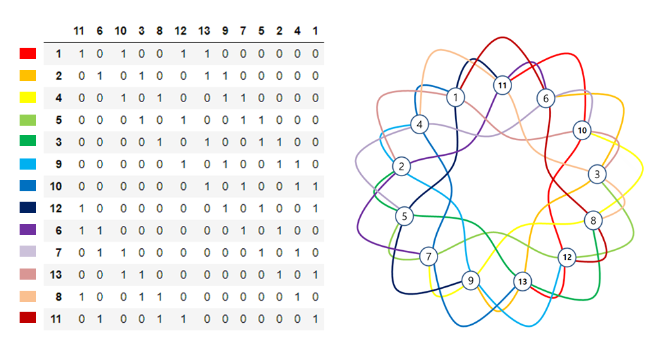

### 2. Projective plane of order 4

In [32]:
from pyfinite import ffield  # 필드(order가 2^n인 경우만) 생성할 때 사용
import numpy as np           # 리스트 연산 또는 행렬 다룰 때 사용
import pandas as pd          
from pandas import DataFrame as df # 메트릭스 생성시 사용 
import itertools
from itertools import product  # 조합 생성시 사용

In [33]:
# 점 리스트 만들기

Order = int(input("숫자를 입력하세요: "))
F = ffield.FField(Order)  # 2^(Order) 인 크기의 field를 생성한다.
Field_Order = 2**Order    

Point1 = []       # (x,y,1) x,y는 F의 원소 
Point2 = []       # (x,1,0) x는 F의 원소
Point3 = [[F.ShowPolynomial(1),F.ShowPolynomial(0),F.ShowPolynomial(0)]] # (1,0,0)

Field = []
for i in range(Field_Order):
    Field.append(F.ShowPolynomial(i))
    
print("")
print("Field of order ", Field_Order,  "= ", Field)
print("")

# Point1 => (x,y,1) 인 경우
for i in range(Field_Order):
    for j in range(Field_Order):
        Point = []
        Point.append(F.ShowPolynomial(i))
        Point.append(F.ShowPolynomial(j))
        Point.append(F.ShowPolynomial(1))
        Point1.append(Point)

# Point2 => (x,1,0) 인 경우
for i in range(Field_Order):
    Point = []
    Point.append(F.ShowPolynomial(i))
    Point.append(F.ShowPolynomial(1))
    Point.append(F.ShowPolynomial(0))
    Point2.append(Point)

Point_set_re = Point1+Point2+Point3
Line_set_re = Point_set_re 

print("Points set :", Point_set_re)
print("")
print("Lines set :", Line_set_re)

숫자를 입력하세요: 2

Field of order  4 =  ['0', '1', 'x^1', 'x^1 + 1']

Points set : [['0', '0', '1'], ['0', '1', '1'], ['0', 'x^1', '1'], ['0', 'x^1 + 1', '1'], ['1', '0', '1'], ['1', '1', '1'], ['1', 'x^1', '1'], ['1', 'x^1 + 1', '1'], ['x^1', '0', '1'], ['x^1', '1', '1'], ['x^1', 'x^1', '1'], ['x^1', 'x^1 + 1', '1'], ['x^1 + 1', '0', '1'], ['x^1 + 1', '1', '1'], ['x^1 + 1', 'x^1', '1'], ['x^1 + 1', 'x^1 + 1', '1'], ['0', '1', '0'], ['1', '1', '0'], ['x^1', '1', '0'], ['x^1 + 1', '1', '0'], ['1', '0', '0']]

Lines set : [['0', '0', '1'], ['0', '1', '1'], ['0', 'x^1', '1'], ['0', 'x^1 + 1', '1'], ['1', '0', '1'], ['1', '1', '1'], ['1', 'x^1', '1'], ['1', 'x^1 + 1', '1'], ['x^1', '0', '1'], ['x^1', '1', '1'], ['x^1', 'x^1', '1'], ['x^1', 'x^1 + 1', '1'], ['x^1 + 1', '0', '1'], ['x^1 + 1', '1', '1'], ['x^1 + 1', 'x^1', '1'], ['x^1 + 1', 'x^1 + 1', '1'], ['0', '1', '0'], ['1', '1', '0'], ['x^1', '1', '0'], ['x^1 + 1', '1', '0'], ['1', '0', '0']]


In [34]:
# 점 리스트 만들기

import numpy as np

Order = int(input("숫자를 입력하세요: "))
F = ffield.FField(Order)
Field_Order = 2**Order

Point1 = []
Point2 = []
Point3 = [[1,0,0]]

for i in range(Field_Order):
    for j in range(Field_Order):
        Point = []
        Point.append(i)
        Point.append(j)
        Point.append(1)
        Point1.append(Point)

for i in range(Field_Order):
    Point = []
    Point.append(i)
    Point.append(1)
    Point.append(0)
    Point2.append(Point)

Point_set_num = Point1+Point2+Point3
Line_set_num = Point_set_num

Point_set_num

숫자를 입력하세요: 2


[[0, 0, 1],
 [0, 1, 1],
 [0, 2, 1],
 [0, 3, 1],
 [1, 0, 1],
 [1, 1, 1],
 [1, 2, 1],
 [1, 3, 1],
 [2, 0, 1],
 [2, 1, 1],
 [2, 2, 1],
 [2, 3, 1],
 [3, 0, 1],
 [3, 1, 1],
 [3, 2, 1],
 [3, 3, 1],
 [0, 1, 0],
 [1, 1, 0],
 [2, 1, 0],
 [3, 1, 0],
 [1, 0, 0]]

In [35]:
## 그림에 rabeling 하기 위해 점들을 간단히 표현

Point_set_ind = []

k = 1

print("       Points")
print("")
for point in Point_set_num:
    print(point, "  ==>  ", k)
    Point_set_ind.append(k)
    k += 1

       Points

[0, 0, 1]   ==>   1
[0, 1, 1]   ==>   2
[0, 2, 1]   ==>   3
[0, 3, 1]   ==>   4
[1, 0, 1]   ==>   5
[1, 1, 1]   ==>   6
[1, 2, 1]   ==>   7
[1, 3, 1]   ==>   8
[2, 0, 1]   ==>   9
[2, 1, 1]   ==>   10
[2, 2, 1]   ==>   11
[2, 3, 1]   ==>   12
[3, 0, 1]   ==>   13
[3, 1, 1]   ==>   14
[3, 2, 1]   ==>   15
[3, 3, 1]   ==>   16
[0, 1, 0]   ==>   17
[1, 1, 0]   ==>   18
[2, 1, 0]   ==>   19
[3, 1, 0]   ==>   20
[1, 0, 0]   ==>   21


In [36]:
print("         Lines             color")
print("")

Line_color_des4 = []

k=0
for line in Line_set_num:
    k+=1
    print(line, "  ==>  ", k)


         Lines             color

[0, 0, 1]   ==>   1
[0, 1, 1]   ==>   2
[0, 2, 1]   ==>   3
[0, 3, 1]   ==>   4
[1, 0, 1]   ==>   5
[1, 1, 1]   ==>   6
[1, 2, 1]   ==>   7
[1, 3, 1]   ==>   8
[2, 0, 1]   ==>   9
[2, 1, 1]   ==>   10
[2, 2, 1]   ==>   11
[2, 3, 1]   ==>   12
[3, 0, 1]   ==>   13
[3, 1, 1]   ==>   14
[3, 2, 1]   ==>   15
[3, 3, 1]   ==>   16
[0, 1, 0]   ==>   17
[1, 1, 0]   ==>   18
[2, 1, 0]   ==>   19
[3, 1, 0]   ==>   20
[1, 0, 0]   ==>   21


In [37]:
new_Point_set = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
new_Line_set = new_Point_set

size = len(Point_set_num)
Matrix = df(data = np.zeros((size,size)), columns = new_Point_set, index = new_Line_set, 
            dtype = 'int', copy=False)
pd.set_option('display.max_row', 21)
pd.set_option('display.max_columns', 21)

In [38]:
Des_Plane = []

print("  Lines", "                                          Points")
print("")
for i in range(len(Line_set_num)):
    line_num = Line_set_num[i]
    line_re = Line_set_re[i]
    
    Point_on_line = []
    
    for j in range(len(Point_set_num)):
        Point_num = Point_set_num[j]
        Point_re = Point_set_re[j]
        
        a1 = F.Multiply(line_num[0],Point_num[0])
        a2 = F.Multiply(line_num[1],Point_num[1])
        a3 = F.Multiply(line_num[2],Point_num[2])
    
        a = F.Add(F.Add(a1,a2),a3)  # field내의 연산에 대한 내적값
        if a == 0: 
            Point_on_line.append(Point_re)
            Matrix.iloc[i,j] = 1
    print(line_re, " : ", Point_on_line)

  Lines                                           Points

['0', '0', '1']  :  [['0', '1', '0'], ['1', '1', '0'], ['x^1', '1', '0'], ['x^1 + 1', '1', '0'], ['1', '0', '0']]
['0', '1', '1']  :  [['0', '1', '1'], ['1', '1', '1'], ['x^1', '1', '1'], ['x^1 + 1', '1', '1'], ['1', '0', '0']]
['0', 'x^1', '1']  :  [['0', 'x^1 + 1', '1'], ['1', 'x^1 + 1', '1'], ['x^1', 'x^1 + 1', '1'], ['x^1 + 1', 'x^1 + 1', '1'], ['1', '0', '0']]
['0', 'x^1 + 1', '1']  :  [['0', 'x^1', '1'], ['1', 'x^1', '1'], ['x^1', 'x^1', '1'], ['x^1 + 1', 'x^1', '1'], ['1', '0', '0']]
['1', '0', '1']  :  [['1', '0', '1'], ['1', '1', '1'], ['1', 'x^1', '1'], ['1', 'x^1 + 1', '1'], ['0', '1', '0']]
['1', '1', '1']  :  [['0', '1', '1'], ['1', '0', '1'], ['x^1', 'x^1 + 1', '1'], ['x^1 + 1', 'x^1', '1'], ['1', '1', '0']]
['1', 'x^1', '1']  :  [['0', 'x^1 + 1', '1'], ['1', '0', '1'], ['x^1', 'x^1', '1'], ['x^1 + 1', '1', '1'], ['x^1', '1', '0']]
['1', 'x^1 + 1', '1']  :  [['0', 'x^1', '1'], ['1', '0', '1'], ['x^1', '1', '1'], ['

In [39]:
Des_Plane = []

print("  Lines", "                              Points")
print("")
for i in range(len(Line_set_num)):
    line_num = Line_set_num[i]
    
    Point_on_line = []
    
    for j in range(len(Point_set_num)):
        Point_num = Point_set_num[j]
        Point_re = Point_set_re[j]
        
        a1 = F.Multiply(line_num[0],Point_num[0])
        a2 = F.Multiply(line_num[1],Point_num[1])
        a3 = F.Multiply(line_num[2],Point_num[2])
    
        a = F.Add(F.Add(a1,a2),a3)  # field내의 연산에 대한 내적값
        if a == 0: 
            Point_on_line.append(Point_num)
            Matrix.iloc[i,j] = 1
    print(line_num, " : ", Point_on_line)

  Lines                               Points

[0, 0, 1]  :  [[0, 1, 0], [1, 1, 0], [2, 1, 0], [3, 1, 0], [1, 0, 0]]
[0, 1, 1]  :  [[0, 1, 1], [1, 1, 1], [2, 1, 1], [3, 1, 1], [1, 0, 0]]
[0, 2, 1]  :  [[0, 3, 1], [1, 3, 1], [2, 3, 1], [3, 3, 1], [1, 0, 0]]
[0, 3, 1]  :  [[0, 2, 1], [1, 2, 1], [2, 2, 1], [3, 2, 1], [1, 0, 0]]
[1, 0, 1]  :  [[1, 0, 1], [1, 1, 1], [1, 2, 1], [1, 3, 1], [0, 1, 0]]
[1, 1, 1]  :  [[0, 1, 1], [1, 0, 1], [2, 3, 1], [3, 2, 1], [1, 1, 0]]
[1, 2, 1]  :  [[0, 3, 1], [1, 0, 1], [2, 2, 1], [3, 1, 1], [2, 1, 0]]
[1, 3, 1]  :  [[0, 2, 1], [1, 0, 1], [2, 1, 1], [3, 3, 1], [3, 1, 0]]
[2, 0, 1]  :  [[3, 0, 1], [3, 1, 1], [3, 2, 1], [3, 3, 1], [0, 1, 0]]
[2, 1, 1]  :  [[0, 1, 1], [1, 3, 1], [2, 2, 1], [3, 0, 1], [3, 1, 0]]
[2, 2, 1]  :  [[0, 3, 1], [1, 2, 1], [2, 1, 1], [3, 0, 1], [1, 1, 0]]
[2, 3, 1]  :  [[0, 2, 1], [1, 1, 1], [2, 3, 1], [3, 0, 1], [2, 1, 0]]
[3, 0, 1]  :  [[2, 0, 1], [2, 1, 1], [2, 2, 1], [2, 3, 1], [0, 1, 0]]
[3, 1, 1]  :  [[0, 1, 1], [1, 2, 1], [2, 0, 

In [40]:
# Des(4)

Des_Plane = []

for i in range(len(Line_set_num)):
    line = Line_set_num[i]
    
    Point_on_line = []
    
    for j in range(len(Point_set_num)):
        Point = Point_set_num[j]
        Point_one_num = new_Point_set[j]
        
        a1 = F.Multiply(line[0],Point[0])
        a2 = F.Multiply(line[1],Point[1])
        a3 = F.Multiply(line[2],Point[2])
    
        a = F.Add(F.Add(a1,a2),a3)  # 내적값
        if a == 0: 
            Point_on_line.append(Point_one_num)
            Matrix.iloc[i,j] = 1
    print(i+1, " : ", Point_on_line)

1  :  [17, 18, 19, 20, 21]
2  :  [2, 6, 10, 14, 21]
3  :  [4, 8, 12, 16, 21]
4  :  [3, 7, 11, 15, 21]
5  :  [5, 6, 7, 8, 17]
6  :  [2, 5, 12, 15, 18]
7  :  [4, 5, 11, 14, 19]
8  :  [3, 5, 10, 16, 20]
9  :  [13, 14, 15, 16, 17]
10  :  [2, 8, 11, 13, 20]
11  :  [4, 7, 10, 13, 18]
12  :  [3, 6, 12, 13, 19]
13  :  [9, 10, 11, 12, 17]
14  :  [2, 7, 9, 16, 19]
15  :  [4, 6, 9, 15, 20]
16  :  [3, 8, 9, 14, 18]
17  :  [1, 5, 9, 13, 21]
18  :  [1, 6, 11, 16, 18]
19  :  [1, 7, 12, 14, 20]
20  :  [1, 8, 10, 15, 19]
21  :  [1, 2, 3, 4, 17]


In [41]:
Matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
7,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
8,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0
10,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


#### 1행을 먼저 정렬한 후, 이를 기준으로 이후의 행들도 정렬 가능한지 확인할 것입니다.
#### 다시 말해, 주어진 행렬이 순환행렬로 변환 가능한지를 확인합니다.

In [42]:
updated_matrix = change_col(1,17,Matrix)
updated_matrix = change_col(3,18,updated_matrix)
updated_matrix = change_col(8,19,updated_matrix)
updated_matrix = change_col(9,20,updated_matrix)
updated_matrix = change_col(12,21,updated_matrix)



fix_index = [1,3,8,9,12]

updated_matrix

,17,2,18,4,5,6,7,19,20,10,11,21,13,14,15,16,1,3,8,9,12
1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0
5,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0
10,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0


In [44]:
def weight_list(updated_matrix):
    
    weight_of_ith = []

    k=1
    for i in range(len(updated_matrix)):
        sum = 0
        for j in range(k):
            sum+=updated_matrix.iloc[0,j]
        k+=1
        weight_of_ith.append(sum)
    weight_of_ith.reverse() 
    
    return weight_of_ith

In [45]:
# 1행에 의한 weight_list 생성

weight_of_ith = weight_list(updated_matrix)
q = Field_Order
print(weight_of_ith)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 3, 2, 2, 2, 2, 2, 1, 1]


In [71]:
# 각 i_th row(i>1)에서 1이 있어야 할 열의 인덱스 리스트

def position_index_of_ith_row(i, matrix, fix_index, q):
    
    one_list = [1 for i in range(q+1)] # ex) one_list = [1,1,1,1,1] where q=4
    point_set_size = q**2+q+1          # ex) if q=4, point_set_size = 21
    
    for j in range(len(one_list)):
        one_list[j] = i-1
    
    fix_index = [(x+y)%point_set_size if x+y>point_set_size else x+y for x,y in zip(fix_index, one_list)]
    fix_index_real_col_num = []
    for j in range(len(fix_index)):
        fix_index_real_col_num.append(matrix.columns[fix_index[j]-1])
        
    return fix_index_real_col_num

In [48]:
for i in range(2, len(updated_matrix)):
    
    ind = updated_matrix.index[i-1] # 접근할 행
    
    # 각 행에 대해서 1이 있어야 할 열의 인덱스를 갖는 리스트
    position_index = position_index_of_ith_row(i, updated_matrix, fix_index, q)

    # (row_change가능한)후보 행 인덱스를 갖는 리스트
    candidate_row_ind_list = candidate_row_index(i, weight_of_ith, updated_matrix)
    
    # 각 후보행 마다 기존 행과 바꾸는 작업 진행  
    # 만약 selected_group이 있으면 for문 종료
    for j in range(len(candidate_row_ind_list)):
        
        # 후보행 리스트에서 하나씩 접근
        access_row_ind = candidate_row_ind_list[j]
        tmp = updated_matrix
        
        # 접근한 후보행과 기존 행 변경
        updated_matrix = change_row(ind,access_row_ind,updated_matrix) 
        
        # check_condition 
        existence, selected_group = check_condition(access_row_ind, position_index, updated_matrix)
        
        if existence == True:
            break
        else:
            updated_matrix = tmp
            continue
    
    # selected_group에 해당하는 pair끼리 column들을 바꾼다.
    updated_matrix = change_columns(selected_group, updated_matrix)
    
updated_matrix

,17,2,19,10,4,16,15,18,21,14,5,20,6,11,3,9,1,7,8,13,12
1,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
8,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
15,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0
18,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0
16,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0
17,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0
19,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1


#### 위의 Matrix representation 을 Picture representation으로 나타내면 다음과 같습니다.

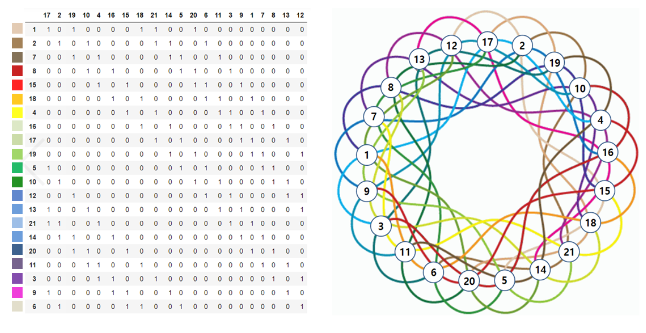

### 3. Projective plane of order 2

#### order가 2인 사영평면의 경우는 order가 3인 사영평면에 대한 방법과 동일합니다.

#### Matrix, Picture representation은 각각 다음과 같습니다.

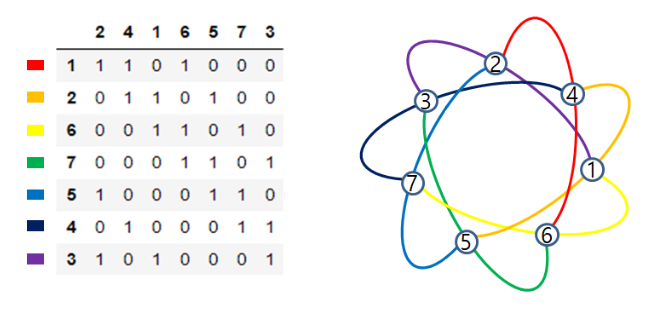